# Домашнее задание 1, задача 2. Стягивание ветвей

*Ветвью* в дереве называется простой путь, соединяющий две вершины степени отличной от двух (то есть, листья и вершины степени больше 2), в котором все промежуточные вершины имеют степень 2. Другими словами, ветвью называется связный фрагмент дерева, не содержащий ветвления. 
В этом задании мы хотим стянуть все ветви в данном дереве в ребра, то есть каждую ветвь заменить на ребро.

Например рассмотрим дерево на картинке ниже.

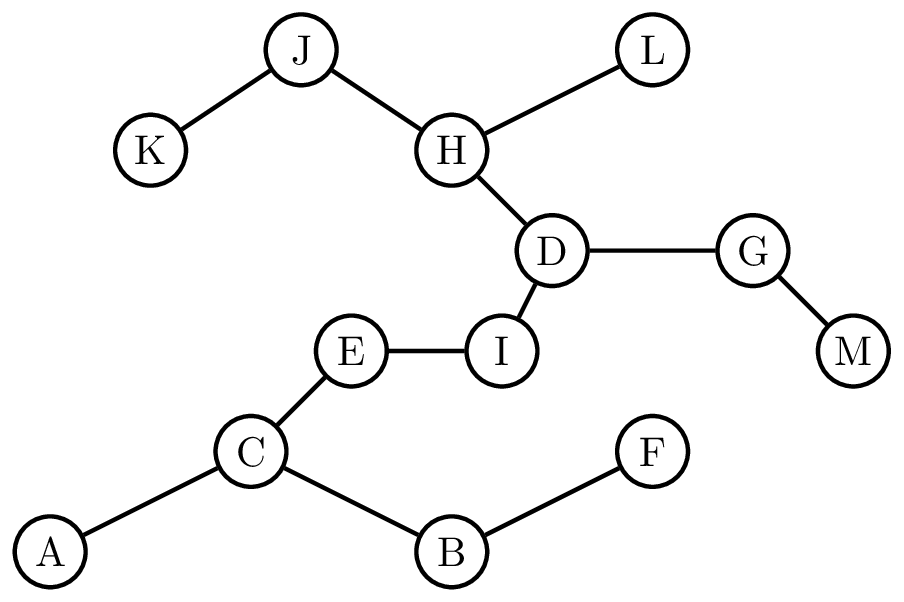

Выделим в ней вершины степени отличной от 2.

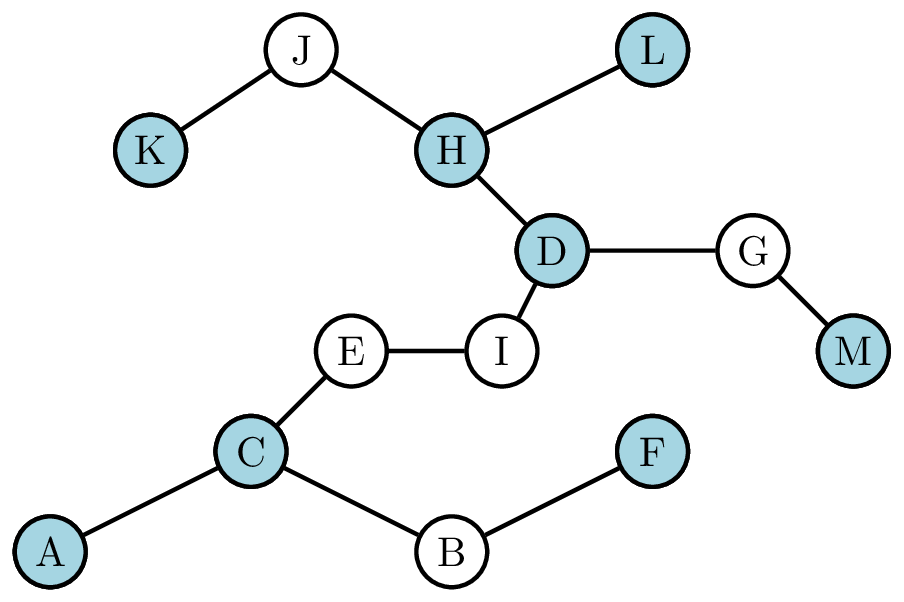

Ветвями являются части дерева между выделенными вершинами. Стянем каждую ветвь в ребро.

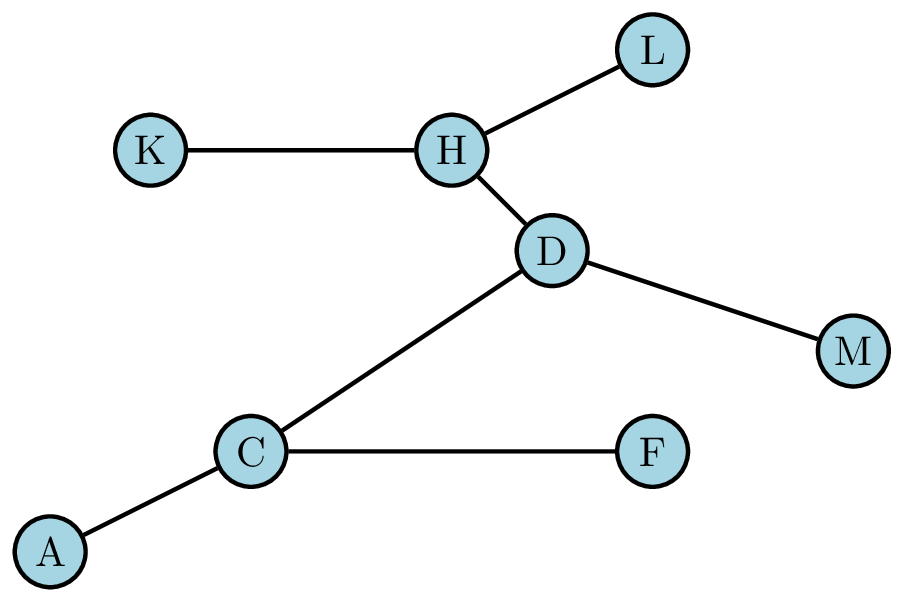


Ту же самую задачу можно сформулировать и по другому. Мы хотим избавиться от вершин степени 2 в дереве: каждую такую вершину мы удаляем, а ее соседей соединяем ребром напрямую. 

Для реализации алгоритма достаточно последовательно перебрать все вершины графа, и если это вершина степени 2, то можно ее удалить, а ее соседей в графе соединить ребром.

---
**Правила сдачи.** Это вторая из двух задач домашнего задания 1. Каждая задача оценивается в 5 баллов.

Дедлайн первого домашнего задания — **25 мая** в 19:00. Решения нужно отправить по адресу pygraphs.sber@gmail.com. Решения будут проверены до 19:00 26 мая. 

Также можно отправить решения до 19:00 **23 мая**. Тогда они будут проверены до 19:00 24 мая и в случае наличия ошибок можно будет успеть их исправить до основного дедлайна.

---



In [1]:
# Здесь мы загружаем библиотеку для работы с графами

import networkx as nx

In [2]:
# Эта функция по данному списку чисел строит дерево с соответствующими степенями вершин, мы обсуждали эту задачу на занятии
# Мы используем эту функцию здесь для генерации тестовых примеров
# Этот блок не нужно изменять

def create_tree(degrees):

    graph = nx.Graph()
    n = len(degrees)
    # Здесь мы проверяем условия, которым должен удовлетворять набор чисел
    if any([elem <= 0 for elem in degrees]) or sum(degrees) != 2 * n - 2:
        return None

    # Здесь мы заводим граф и заводим вершины в нем
    graph.add_nodes_from(range(n))
    for _ in range(n - 1):
        # Выбираем какую-нибудь вершину степени 1
        i = degrees.index(1)
        degrees[i] -= 1
        # Выбираем вершину максимальной степени 
        j = degrees.index(max(degrees))
        graph.add_edge(i, j)
        degrees[j] -= 1

    return graph

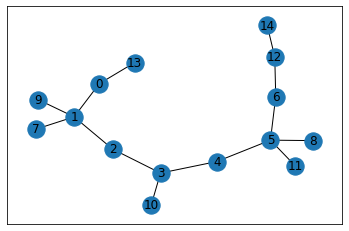

In [3]:
# Здесь мы задаем пример дерева, он может быть полезен для тестирования алгоритма. 

#G = create_tree([1, 3, 1, 2, 1, 3, 1])
G = create_tree([2, 4, 2, 3, 2, 4, 2, 1, 1, 1, 1, 1, 2, 1, 1])

nx.draw_networkx(G)

Степень вершины 2 равна 2, а ее соседи, это [3, 0]


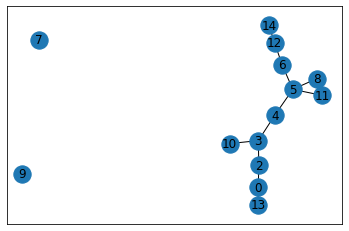

In [4]:
# Здесь собраны полезные команды, чтобы их не нужно было искать

# Создадим копию графа, чтобы не портить основной
H = G.copy()

# Этой командой можно удалить вершину
H.remove_node(1)
#nx.draw_networkx(H)

# Этой командой можно добавить ребро
H.add_edge(0,2)
nx.draw_networkx(H)

# Печатаем соседей вершины 2 и ее степень
print(f"Степень вершины 2 равна {H.degree(2)}, а ее соседи, это {list(H[2])}")


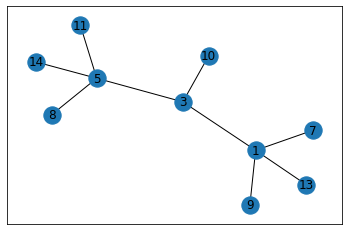

In [5]:
# В этом блоке нужно реализовать стягивание ветвей дерева

def construct_branch_tree(G):
    # Создаем копию списка вершин, она может пригодиться
    node_list = list(G.nodes()).copy()
    # Реализуйте здесь стягивание ветвей
    for vertex in node_list:
        if G.degree(vertex) == 2:
            neighbours = list(G[vertex])
            G.remove_node(vertex)
            G.add_edge(neighbours[0], neighbours[1])          
    return G

H = construct_branch_tree(G.copy())

nx.draw_networkx(H)